## AVIATION ACCIDENT RISK ANALYSIS PROJECT

### 1. PROJECT OVERVIEW
This project analyzes data of the aviation accidents in history to show patterns,risks and different trends that has an impact on flight safety. 
The aim of this analysis is to provide insights to the aviation industry and help them to make better decisions to improve aviation safety and reduce accidents.
This analysis is divided into two different parts,they include;
1. Data Analysis
2. Data Visualization

### 2. DATA SOURCE
The dataset used for this analysis was sourced from the National Transportation Safety Board (NTSB) records on accidents from 1962 to 2023 in the United States and international waters.
The objective is to determine which aircraft has the lowest risk of accidents,and come up with a recommendation on the aircraft to purchase.



### DATA ANALYSIS

Importing the necessary libraries

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Reading the CSV file

In [420]:
data = pd.read_csv("AviationData.csv", encoding='latin=1')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16396\3294407331.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("AviationData.csv", encoding='latin=1')


### Data inspection
We inspect the data to understand its structure and get an overview of its content. We'll use:
      1:data.info()-to get a summary of the dataset
      2:data.head()-to display the first five rows
      3:data.describe()-to get a statistical summary of the numerical columns


In [421]:
#summary of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [422]:
#displays the first five rows of the dataset
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/04/1980


In [423]:
#gives the arithmetic statistics for numerical columns
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Data Cleaning
With this we aim to improve the data before further analysis and visualization bey cheacking for missing values and filling them,checking for duplicates and removing inaccurate data. We'll use:
       1.data[data.duplicated()]-to check for duplicates
       2.data.isnull().sum()-to count the missing values per column

In [424]:
#checking for duplicates
data[data.duplicated()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


In [425]:
#counting the missing values per column
data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

We can see that we have no duplicates in our dataset but have several missing values. Next step is to do a visual representation on a bar graph to get a clear picture on which rows to drop and which rows to fill

A BAR GRAPH VISUALIZATION FOR MISSING VALUES


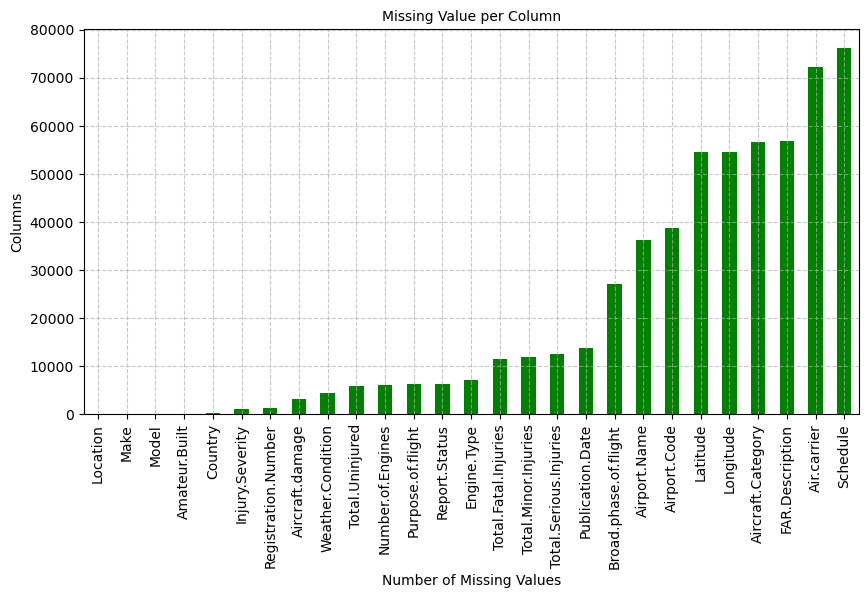

In [426]:
missing_values= data.isnull().sum() #this checks for missing values
missing_values = missing_values[missing_values>0].sort_values()
#plotting the bar graph
plt.figure(figsize=(10,5))
missing_values.plot(kind='bar', color = 'green')
plt.title('Missing Value per Column', fontsize=10)
plt.xlabel('Number of Missing Values', fontsize=10)
plt.ylabel('Columns',fontsize=10)
plt.grid(linestyle='--',alpha=0.7)
plt.show()

### Handling Missing Values

### Dropping columns with too many missing values
From the visualization above,we have columns with a lot of missing values and most of them do not contribute to our analysis of understanding the risks and safety of an aircraft.
I'll therefore drop values with excessive missing values in columns that have most missing values and those that are of not neccessary for the analysis. They include:
    1.Schedule
    2.Air.carrier
    3.FAR.Description
    4.Airport.Code
    5.Airport.Name
    6.Latitude
    7.Longitude

In [427]:
#dropping columns with missing values and of less importance to the analysis
columns_to_drop = ['Airport.Name','Airport.Code','FAR.Description','Air.carrier','Schedule','Latitude','Longitude','Aircraft.Category']
data.drop(columns=columns_to_drop, inplace=True)

Check if the columns were successfully dropped

In [428]:
print(data.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')


The columns with many missing values have successfully

In [429]:
data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64

### Handling Numerical Columns that has Missing Values


First i will identify  which columns are numerical in the dataset.


In [430]:
#listing all columns and their data types
print(data.dtypes)

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Injury.Severity            object
Aircraft.damage            object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
Publication.Date           object
dtype: object


The only numerical columns in the dataset includes:Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries and Total.Uninjured.

Next i'll get the mean of the numerical column.

In [431]:
#getting the mean of each numerical column in the dataset
total_fatal_Injuries_mean = data['Total.Fatal.Injuries'].mean()
total_minor_injuries_mean = data['Total.Minor.Injuries'].mean()
total_serious_injuries_mean = data['Total.Serious.Injuries'].mean()
total_uninjured_mean = data['Total.Uninjured'].mean()

print("mean of total fatal injuries:", total_fatal_Injuries_mean)
print("mean of total minor injuries:", total_minor_injuries_mean)
print("mean of total serious injuries:", total_serious_injuries_mean)
print("mean of total uninjured:", total_uninjured_mean)

mean of total fatal injuries: 0.6478551517654346
mean of total minor injuries: 0.3570611778158948
mean of total serious injuries: 0.27988059545162935
mean of total uninjured: 5.325439579642552


### Filling the missing numerical values in the numerical columns.

I'll now use the computed mean to fill the missing values in the numerical columns.


In [432]:
#filling missing values with computed mean
data['Total.Fatal.Injuries']. fillna(total_fatal_Injuries_mean, inplace=True)
data['Total.Minor.Injuries'].fillna(total_minor_injuries_mean, inplace=True)
data['Total.Serious.Injuries'].fillna(total_serious_injuries_mean, inplace=True)
data['Total.Uninjured'].fillna(total_uninjured_mean, inplace=True)
print("missing values after imputation")
print(data[['Total.Fatal.Injuries','Total.Minor.Injuries','Total.Serious.Injuries','Total.Uninjured']].isnull().sum())

missing values after imputation
Total.Fatal.Injuries      0
Total.Minor.Injuries      0
Total.Serious.Injuries    0
Total.Uninjured           0
dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16396\199136020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Total.Fatal.Injuries']. fillna(total_fatal_Injuries_mean, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16396\199136020.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [433]:
data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64

i've successfully filled the missing values in the numerical columns.


### Handling missing categorical data columns
After filling the missing values in numerical columns, we need to handle the missing values in the categorical columns. We can use the mode of the columns to fill the missing values.
We'll first find the categorical columns in our dataset.

In [434]:
categorical_columns = data.select_dtypes(include=['object']).columns

print("categorical_columns:",categorical_columns)

categorical_columns: Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Engine.Type',
       'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight',
       'Report.Status', 'Publication.Date'],
      dtype='object')


We have the categorical columns,now we compute the mode for each column.

In [435]:
#getting the mode of the categorical columns
categorical_cols = ['Country','Broad.phase.of.flight','Injury.Severity','Aircraft.damage','Make','Model','Amateur.Built','Number.of.Engines','Engine.Type','Purpose.of.flight','Weather.Condition','Report.Status']
categorical_columns_modes = data[categorical_cols].mode().iloc[0]
print(categorical_columns_modes)

Country                   United States
Broad.phase.of.flight           Landing
Injury.Severity               Non-Fatal
Aircraft.damage             Substantial
Make                             Cessna
Model                               152
Amateur.Built                        No
Number.of.Engines                   1.0
Engine.Type               Reciprocating
Purpose.of.flight              Personal
Weather.Condition                   VMC
Report.Status            Probable Cause
Name: 0, dtype: object


### Filling the missing categorical values in the categorical columns
I'll now fill the missing categprical values in the categorical columns with the mode of the columns. This is because mode is the most common value in the column.


In [436]:
#replacing missing values with the computed mode
data[categorical_cols]= data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])
print(data[categorical_cols].isnull().sum())

Country                  0
Broad.phase.of.flight    0
Injury.Severity          0
Aircraft.damage          0
Make                     0
Model                    0
Amateur.Built            0
Number.of.Engines        0
Engine.Type              0
Purpose.of.flight        0
Weather.Condition        0
Report.Status            0
dtype: int64


In [437]:
#checking that the missing values have been filled
data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number        1382
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          13771
dtype: int64

Filling Location column with unkwown value


In [438]:
#this code fills the location column missing values with unkwown
data['Location'].fillna('unkwown',inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16396\3487259130.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Location'].fillna('unkwown',inplace=True)


Filling the Registration.Number missing values with unkwown

In [439]:
#this code fills the registration number column missing values with unkown
data['Registration.Number'].fillna('unkown', inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16396\2352973189.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Registration.Number'].fillna('unkown', inplace=True)


In [440]:
data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          13771
dtype: int64

I have successfully handled all the missing values in the dataset.Next i'll check for the types of data in the dataset and change all the columns with dates into datetime format. This will help in sorting dates chronologically,resampling data at different time frequencies and visualization for correct labelling of the  axis.

In [441]:
print(data.dtypes)

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Injury.Severity            object
Aircraft.damage            object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
Publication.Date           object
dtype: object


In [442]:
#changing event.date and publication.date into datetime format.
data['Event.Date']= pd.to_datetime(data['Event.Date'], dayfirst=True)
data['Publication.Date'] = pd.to_datetime(data['Publication.Date'], dayfirst=True)

In [443]:
#checking if the datetime format was achieved
print(data.dtypes)

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Injury.Severity                   object
Aircraft.damage                   object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Weather.Condition                 object
Broad.phase.of.flight             object
Report.Status                     object
Publication.Date          datetime64[ns]
dtype: object


In [444]:
#verifying datetime conversion
print(data[['Event.Date','Publication.Date']].head())

  Event.Date Publication.Date
0 1948-10-24              NaT
1 1962-07-19       1996-09-19
2 1974-08-30       2007-02-26
3 1977-06-19       2000-09-12
4 1979-08-02       1980-04-16


The data types are now all in the correct format.


In [445]:
#getting a clear summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88889 non-null  object        
 5   Country                 88889 non-null  object        
 6   Injury.Severity         88889 non-null  object        
 7   Aircraft.damage         88889 non-null  object        
 8   Registration.Number     88889 non-null  object        
 9   Make                    88889 non-null  object        
 10  Model                   88889 non-null  object        
 11  Amateur.Built           88889 non-null  object        
 12  Number.of.Engines       88889 non-null  float6

### Feature Engineering
I'll now perform some feature engineering on the data in order to transform raw data into a form that is more meaningful to the analysis. This will held identify accidents patterns,quantify relationship between flight conditons and outcomes and also support recommendations on safety.

### Creating a Total_Injuries column
This column is used to quantify overall accidents impact.

In [446]:
#total injuries column 
data['Total_Injuries']= (data['Total.Fatal.Injuries']+data['Total.Minor.Injuries']+data['Total.Serious.Injuries'])


In [447]:
#checking if the column was added successfully
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Total_Injuries'],
      dtype='object')

In [448]:
data['Total_Injuries'].head()

0    2.000000
1    4.000000
2    3.636942
3    2.000000
4    3.357061
Name: Total_Injuries, dtype: float64

Column was created successfully.

### Creating the Fatal and Non-Fatal Column



In [449]:
#creating fatal and non-fatal accident column
data['Fatal_Accident'] = data['Total.Fatal.Injuries'].apply(lambda x: 'Fatal' if x > 0 else 'Non-Fatal')

In [450]:
#checking the first 5 rows on our dataset for fatal accidents and fatal injuries
print(data[['Total.Fatal.Injuries','Fatal_Accident']].head(5))

   Total.Fatal.Injuries Fatal_Accident
0                   2.0          Fatal
1                   4.0          Fatal
2                   3.0          Fatal
3                   2.0          Fatal
4                   1.0          Fatal


In [451]:
#checking for the total number of both fatal and non-fatal accidents
print(data['Fatal_Accident'].value_counts())

Fatal_Accident
Non-Fatal    59675
Fatal        29214
Name: count, dtype: int64


In [452]:
#checking for accidents severity
data['Injury.Severity']

0         Fatal(2)
1         Fatal(4)
2         Fatal(3)
3         Fatal(2)
4         Fatal(1)
           ...    
88884        Minor
88885    Non-Fatal
88886    Non-Fatal
88887    Non-Fatal
88888        Minor
Name: Injury.Severity, Length: 88889, dtype: object

I have analysed the data and added the columns that will be helpful for the analysis. Next i'll visualize the data and try to find out patterns that will give meaningful insights for this analysis.

### DATA VISUALIZATION

This visualization is intended to check for patterns in the data thatwill help identify key risk factors,and come up with better safety measures to mitigate risks.
I'll use several plots to visualize the data. They include:
      -A count plot
      -A Lineplot
      -A Scatterplot
      -A Boxplot
      -A Heatmap
      -A Correlation plot

### A Countplot
This visualization tool will show thr frequency of aviation accidents in every year helping come up with a trend in aviation accidents.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16396\2264819533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Year'],palette='mako')


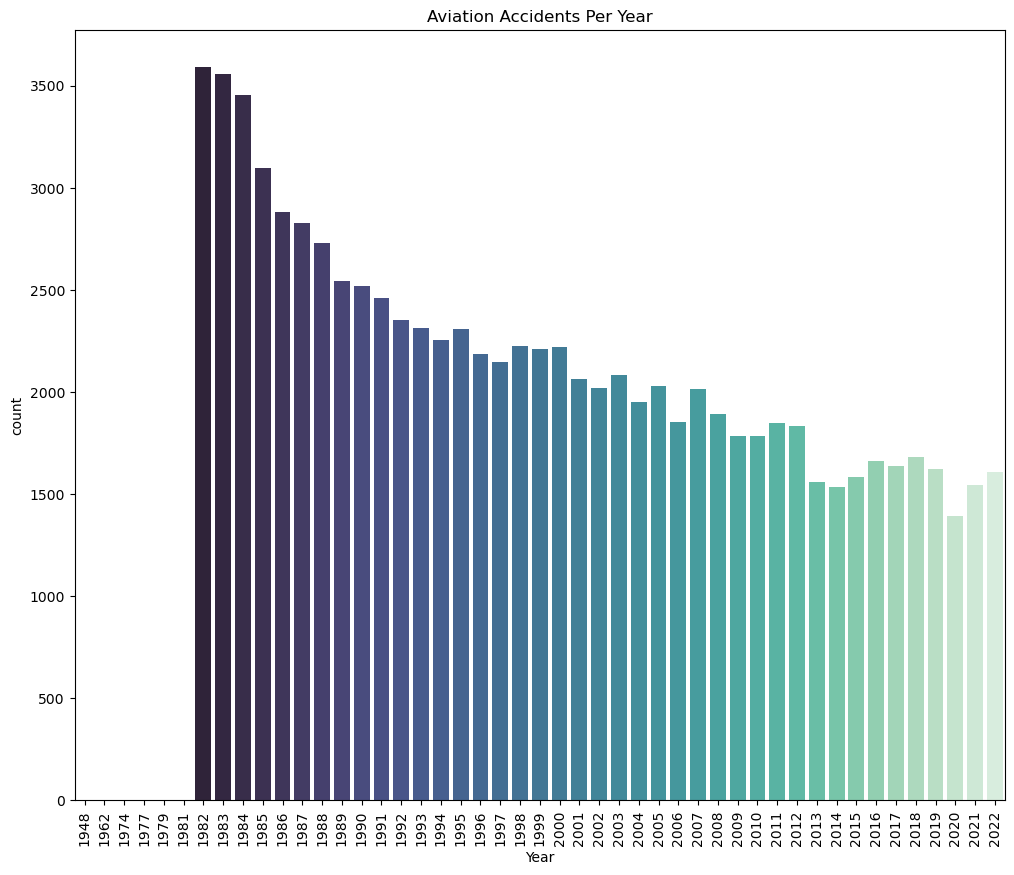

In [453]:
# This count plot visualizes the number of aviation accidents per year
# Plot number of accidents per year
data['Year'] = data['Event.Date'].dt.year
plt.figure(figsize=(12, 10))
sns.countplot(x=data['Year'],palette='mako')
plt.xticks(rotation=90)
plt.title('Aviation Accidents Per Year')
plt.show();

From the countplot above we can see that the aviation accidents have been declining over years.This can be due to a number of reasons like the development of technology, the improvement of more strict safety protocols. In the year 2020 there is a considerable decline in the number of aviation accidents probably due to the Covid-19 pandemic that caused low air travel.

However further analysis is required to understand the severity of accidents over years using a countplot.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16396\1196423756.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Non-Fatal','Fatal')


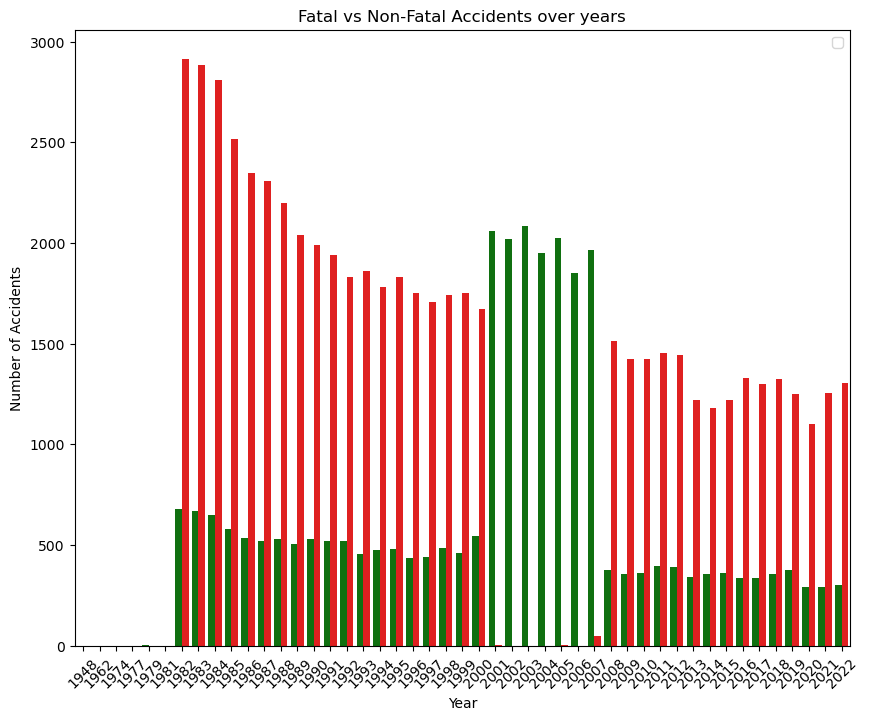

In [454]:
#comparison of fatal and non-fatal accidents over years
plt.figure(figsize=(10,8))
sns.countplot(data=data, x='Year',hue='Fatal_Accident', palette={'Fatal':'Green','Non-Fatal':'red'})
plt.title('Fatal vs Non-Fatal Accidents over years')
plt.ylabel('Number of Accidents')
plt.legend('Non-Fatal','Fatal')
plt.xticks(rotation=45)
plt.show();

From the plot above, we can see that the non-fatal accidents are more as compared to the fatal accidents. This can be due to companies adopting new technologies. However there are years with more fatal accidents than non fatal accidents. This can due to several reasons like change of weather conditions or phase of flight. We'll then check for weather conditions for fatal accidents and also the flight phases using a bar plot.

### A Bar Plot

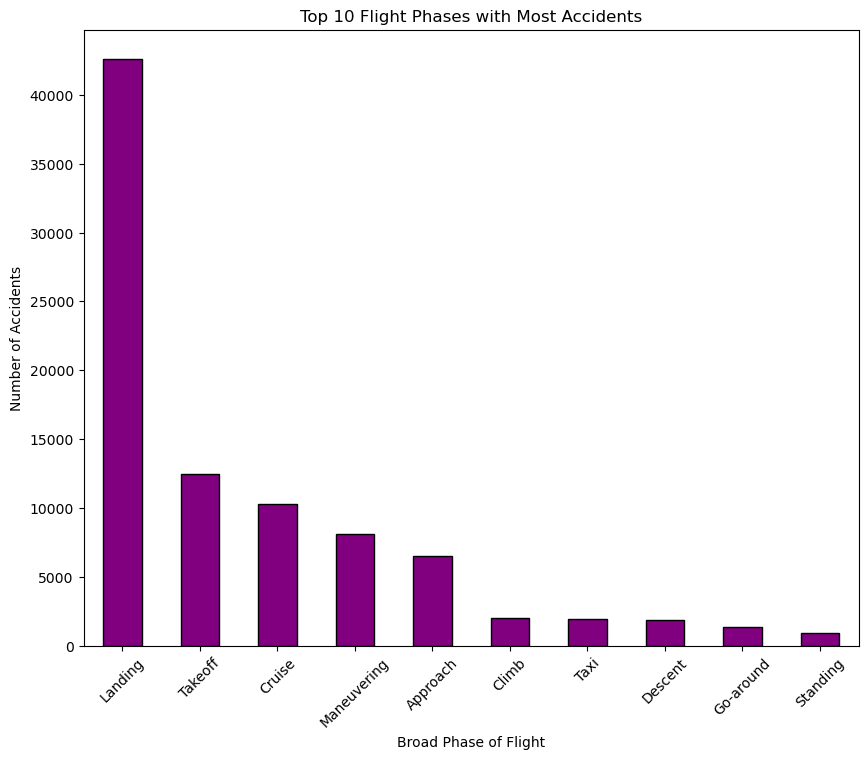

In [455]:
#a bar plot of the top 10 flight phases with the most accidents
data['Broad.phase.of.flight'].value_counts().head(10).plot(kind='bar', figsize=(10,8), color='purple', edgecolor='black')

plt.title('Top 10 Flight Phases with Most Accidents')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show();

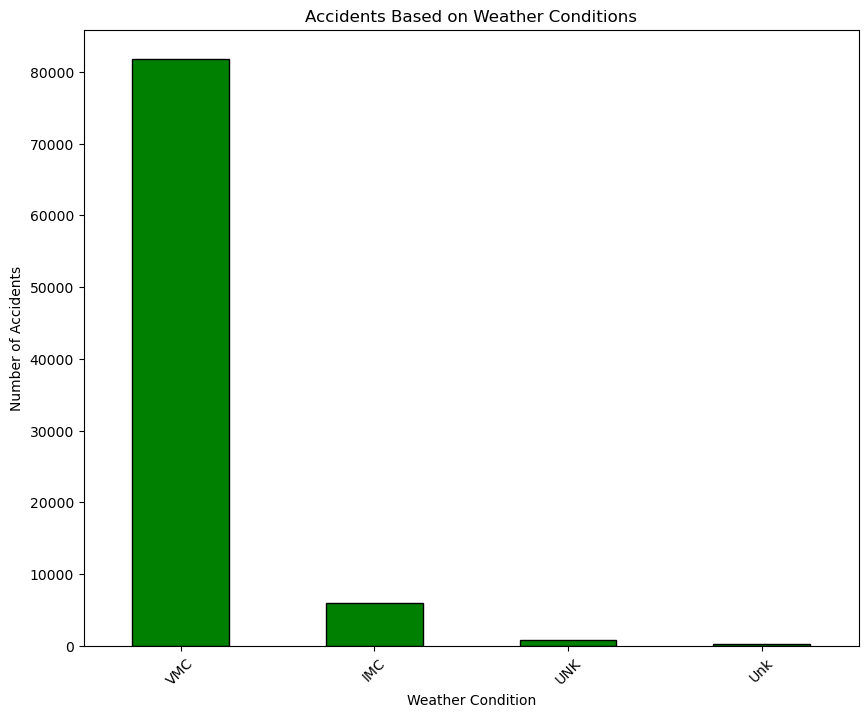

In [456]:
# This bar chart categorizes accidents by weather conditions

data['Weather.Condition'].value_counts().plot(kind='bar', figsize=(10,8), color='green', edgecolor='black')

plt.title('Accidents Based on Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

From the visualization above we can see that most accidents happen during landing and take off phases. This may be caused by low altitude and engine failures respectively. On the weather conditions analysis, most accidents are due to visual conditions and  Instrumental Meterological Conditions(IMC)like fog,rain or snow. This can be because most flights are designed to work well in good weather conditions.

Next we'll explore what impact the make has on the accident rate.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16396\3956670333.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette='coolwarm')


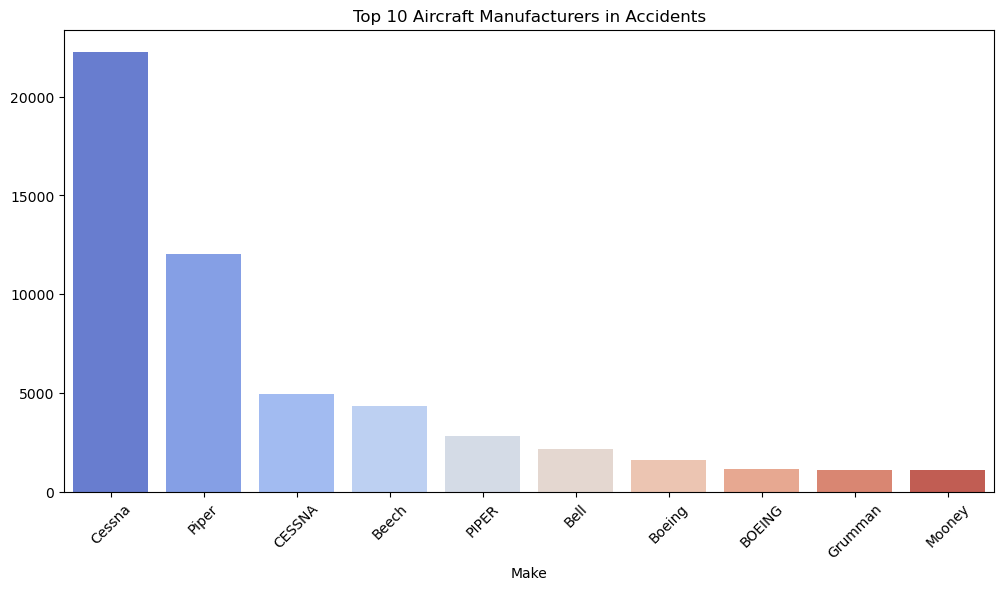

In [457]:
#This bar plot highlights the aircraft manufacturers most commonly involved in aviation accidents.
top_makes = data['Make'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_makes.index, y=top_makes.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Aircraft Manufacturers in Accidents')
plt.show()

Cessna has the highest number of accidents as compared to other makes this could be because of the fact that the company has a big production of both commercial and general aviation aircrafts. Mooney on the other hand has the lowest number of accidents because it has a smaller production of general aviation aircrafts translating to less accidents by count. So from this analysis the make has low impact on the accidents rate.

### Scatter Plot
Scatter plot will give a clear relationship between variables(phase of flight and fatal injuries)and we'll see if there is a hidden pattern and also identify high risk stages.


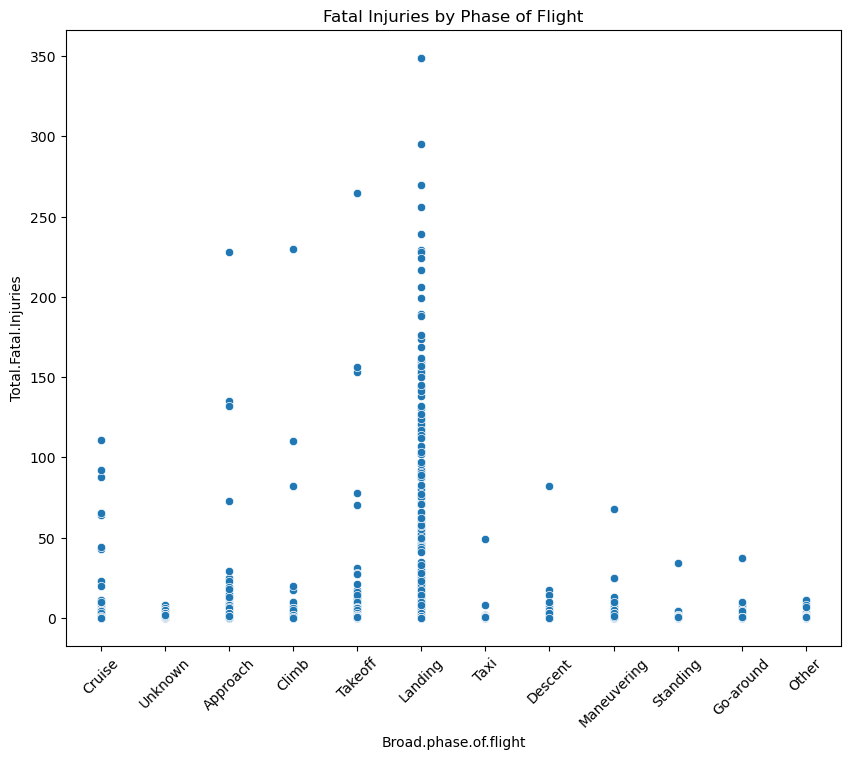

In [458]:
# This scatter plot shows which phase of flight has the most fatalities.
plt.figure(figsize=(10,8))
sns.scatterplot(x=data['Broad.phase.of.flight'], y=data['Total.Fatal.Injuries'])
plt.xticks(rotation=45)
plt.title("Fatal Injuries by Phase of Flight")
plt.show()

Takeoff and landing are mostly the critical phase of a flight and by the visualization above,they lead in the highest phase where accident happen. This shows that human error id the main cause of accidents at this phase,which can be corrected by gettin enough training for the pilots.

Next we'll check if the number of engines contributes to the level of fatalities.

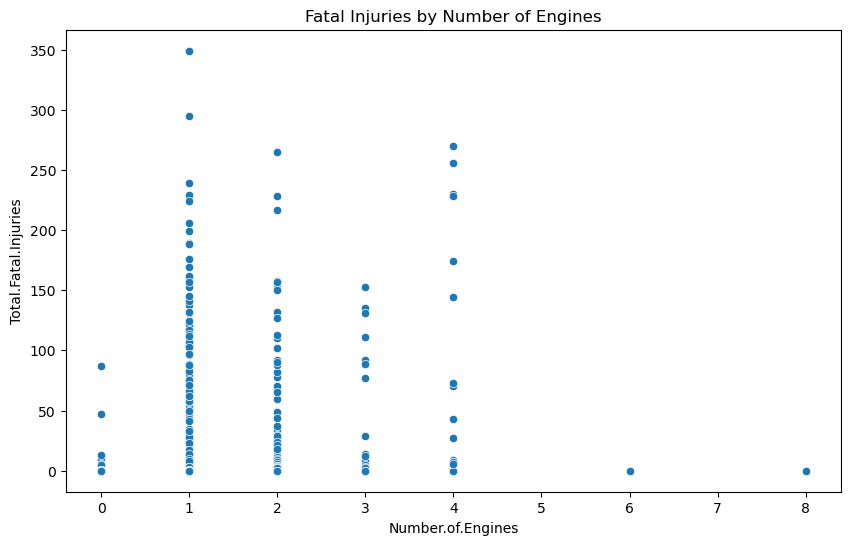

In [459]:
# This scatter plot explores whether single-engine vs. multi-engine aircraft experience more fatalities.
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Number.of.Engines'], y=data['Total.Fatal.Injuries'])
plt.title("Fatal Injuries by Number of Engines")
plt.show()

Planes with one or two engines have high numbers of fatalities due to several reasons. First it lacks redundancy this is to mean no back up power,resulting to a crash landing. Second thwy have design limitations when it comes to things related to altitude and speed.On the other hand multi-engined aircrafts have full redundancy and are more stable.Also they have strict regulations and guidelines for their operations. 

Aircrafts  with more than two engines are highly recommended. Bu in the case of a single or twin engined craft,more training and safety measures should be put in place to handle emergencies on board.



### CORRELATION OF TWO VARIABLES
In this section im going to find the correlation between two variables.

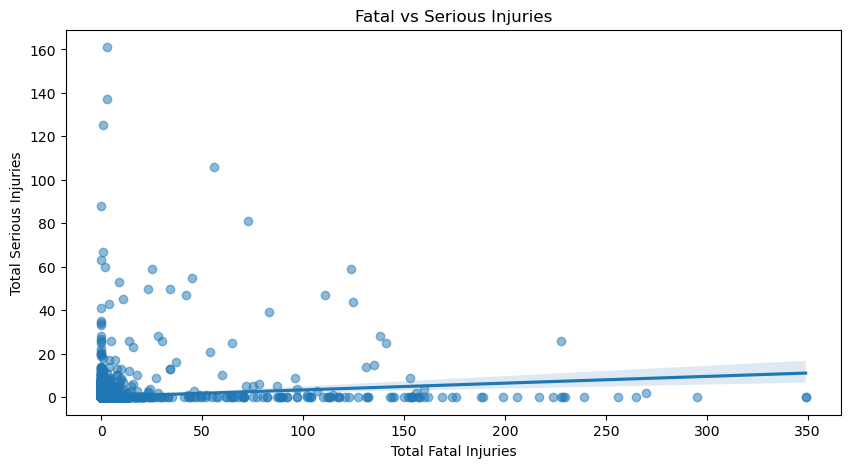

In [460]:
# checking the correlation between fatal injuries and serious injuries

plt.figure(figsize=(10, 5))
sns.regplot(x=data['Total.Fatal.Injuries'], y=data['Total.Serious.Injuries'], scatter_kws={'alpha':0.5})
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Total Serious Injuries')
plt.title('Fatal vs Serious Injuries')
plt.show();

In [461]:
correlation = data['Total.Fatal.Injuries'].corr(data['Total.Serious.Injuries'])
print(f'Correlation: {correlation:.4f}')

Correlation: 0.1112


A correlation of 0.1112 indicates a weak positive correlation between fatal injuries and serious injuries. This means that hoewever serious an injuries is it doesn't mean that its fatal.

### Exporting my Data as a cleaned csv file

In [462]:
data.to_csv('./data/cleaned_aviation_data.csv', index=False)

### Findings
 1.Human error- Human error remains the most common cause of aviation accidents.

 2.Mechanical failure-This can be be caused by poor maintenance, faulty equipment among other reasons.
 
 3.Weather conditions- VMC and IMC is the leading cause of weather related accidents the aviation accidents.



### RECOMMENDATIONS
1. Improving safety through advanced technology rigorous training
2. Strict regulations.
3. Enhanced pilot training
4. Better air traffic control systems have significantly reduced accidents
5. Enhance air traffic control systems.
